# Trabalho 1 — Modelagem de Sistema de EDOs

Este sistema modela uma **reação em série** típica, onde a **sacarose** (C₁₂H₂₂O₁₁) se decompõe inicialmente em **glicose** (C₆H₁₂O₆) e **frutose** (C₆H₁₂O₆), que por sua vez reagem formando produtos finais: **ácidos** e **furfurais**.

**Integrantes:**  
- Breno Montanha Costa — 202265513B  
- Lucas Henrique Nogueira — 202265515B  

---

## Sistema Modelado

A reação modelada é uma hidrólise ácida da sacarose, seguida de degradação dos monossacarídeos.  

O processo completo pode ser descrito pelas seguintes etapas:

**Etapa 1: Hidrólise da sacarose**

$$
\mathrm{C_{12}H_{22}O_{11}} + \mathrm{H_2O} \xrightarrow{\mathrm{HCl}, \, 90^\circ \mathrm{C}} \mathrm{C_6H_{12}O_6} \ (\text{Glicose}) \ + \ \mathrm{C_6H_{12}O_6} \ (\text{Frutose})
$$

**Etapa 2: Degradação da glicose ou frutose**

$$
\mathrm{C_6H_{12}O_6} \xrightarrow{\mathrm{HCl}, \, 90^\circ \mathrm{C}} \text{Ácidos} + \text{Furfurais}
$$

**Reação global**

$$
\mathrm{C_{12}H_{22}O_{11}} + \mathrm{H_2O} \xrightarrow{\mathrm{HCl}, \, 90^\circ \mathrm{C}} \text{Ácidos} + \text{Furfurais}
$$

---

## Equações diferenciais

$$ 
\frac{dC_1}{dt} = -\gamma_1 \, C_1
$$

$$
\frac{dC_2}{dt} = \gamma_1 \, C_1 - \gamma_2 \, C_2
$$

$$
\frac{dC_3}{dt} = \gamma_2 \, C_2
$$

---

## Variáveis do sistema

- $C_1(t)$ — concentração de **sacarose** (mol)  
- $C_2(t)$ — concentração de **glicose + frutose** (mol)  
- $C_3(t)$ — concentração de **ácidos e furfurais** (mol)  

---

## Condições iniciais

- $C_1(0) = 0.292 \ \mathrm{mol}$  
- $C_2(0) = 0 \ \mathrm{mol}$  
- $C_3(0) = 0 \ \mathrm{mol}$  

---

## Parâmetros cinéticos

- $\gamma_1 = 0.083 \ \mathrm{min^{-1}}$ — constante de decomposição da sacarose  
- $\gamma_2 = 0.010 \ \mathrm{min^{-1}}$ — constante de conversão da glicose + frutose em produtos finais  

---

## Condições experimentais

- **Catalisador:** ácido clorídrico (HCl), pH = 1  
- **Temperatura:** 90 °C  

---

In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
from scipy.integrate import odeint
import time
import pandas as pd

In [ ]:
# Define the initial conditions
C1_initial = 0.292
C2_initial = 0
C3_initial = 0

# Define the parameters
y1 = 0.083
y2 = 0.010

In [ ]:
# Define the differential equations for the system
def C1_f(C1_ant, C2_ant, C3_ant, t):
    return -y1 * C1_ant

def C2_f(C1_ant, C2_ant, C3_ant, t):
    return y1 * C1_ant -y2 * C2_ant

def C3_f(C1_ant, C2_ant, C3_ant, t):
    return y2 * C2_ant

In [ ]:
# Define the analytical solution for the system
def analytical_solution(t):
    C1 = C1_initial * np.exp(-y1 * t)
    C2 = (C1_initial * y1 / (y2 - y1)) * (np.exp(-y1 * t) - np.exp(-y2 * t))
    C3 = C1_initial * (1 - (y2 * np.exp(-y1 * t) - y1 * np.exp(-y2 * t)) / (y2 - y1))
    return C1, C2, C3

In [ ]:
# Define the Euler explicit method for solving the system of equations
def Euler_explicit(C1_0, C2_0, C3_0, t, h):
    C1 = np.zeros(len(t))
    C2 = np.zeros(len(t))
    C3 = np.zeros(len(t))
    C1[0] = C1_0
    C2[0] = C2_0
    C3[0] = C3_0
    for i in range(len(t)-1):
        C1[i+1] = C1[i] + h*C1_f(C1[i], C2[i], C3[i], t)
        C2[i+1] = C2[i] + h*C2_f(C1[i], C2[i], C3[i], t)
        C3[i+1] = C3[i] + h*C3_f(C1[i], C2[i], C3[i], t)
    return C1, C2, C3

In [ ]:
# Define the Runge-Kutta 4th order method for solving the system of equations
def RK4(C1_0, C2_0, C3_0, t, h):
    C1 = np.zeros(len(t))
    C2 = np.zeros(len(t))
    C3 = np.zeros(len(t))
    C1[0] = C1_0
    C2[0] = C2_0
    C3[0] = C3_0
    for i in range(len(t)-1):
        k1_C1 = C1[i]
        k1_C2 = C2[i]
        k1_C3 = C3[i]
        k2_C1 = C1[i] + (h/2) * C1_f(k1_C1, k1_C2, k1_C3, t[i])
        k2_C2 = C2[i] + (h/2) * C2_f(k1_C1, k1_C2, k1_C3, t[i])
        k2_C3 = C3[i] + (h/2) * C3_f(k1_C1, k1_C2, k1_C3, t[i])
        k3_C1 = C1[i] + (h/2) * C1_f(k2_C1, k2_C2, k2_C3, t[i] + h/2)
        k3_C2 = C2[i] + (h/2) * C2_f(k2_C1, k2_C2, k2_C3, t[i] + h/2)
        k3_C3 = C3[i] + (h/2) * C3_f(k2_C1, k2_C2, k2_C3, t[i] + h/2)
        k4_C1 = C1[i] + h * C1_f(k3_C1, k3_C2, k3_C3, t[i] + h/2)
        k4_C2 = C2[i] + h * C2_f(k3_C1, k3_C2, k3_C3, t[i] + h/2)
        k4_C3 = C3[i] + h * C3_f(k3_C1, k3_C2, k3_C3, t[i] + h/2)
        C1[i+1] = C1[i] + (h/6) * (C1_f(k1_C1, k1_C2, k1_C3, t[i]) + 2*C1_f(k2_C1, k2_C2, k2_C3, t[i]) + 2*C1_f(k3_C1, k3_C2, k3_C3, t[i]) + C1_f(k4_C1, k4_C2, k4_C3, t[i]))
        C2[i+1] = C2[i] + (h/6) * (C2_f(k1_C1, k1_C2, k1_C3, t[i]) + 2*C2_f(k2_C1, k2_C2, k2_C3, t[i]) + 2*C2_f(k3_C1, k3_C2, k3_C3, t[i]) + C2_f(k4_C1, k4_C2, k4_C3, t[i]))
        C3[i+1] = C3[i] + (h/6) * (C3_f(k1_C1, k1_C2, k1_C3, t[i]) + 2*C3_f(k2_C1, k2_C2, k2_C3, t[i]) + 2*C3_f(k3_C1, k3_C2, k3_C3, t[i]) + C3_f(k4_C1, k4_C2, k4_C3, t[i]))
    return C1, C2, C3

In [ ]:
# Define the Adams-Bashforth method for solving the system of equations
def Adams_bashforth(C1_0, C2_0, C3_0, t, h):
    C1 = np.zeros(len(t))
    C2 = np.zeros(len(t))
    C3 = np.zeros(len(t))
    C1[0] = C1_0
    C2[0] = C2_0
    C3[0] = C3_0
    C1[:4], C2[:4], C3[:4] = RK4(C1_0, C2_0, C3_0, t[:4], h)
    for i in range(3, len(t)-1):
        C1[i+1] = C1[i] + (h/24) * (55*C1_f(C1[i], C2[i], C3[i], t[i]) - 59*C1_f(C1[i-1], C2[i-1], C3[i-1], t[i-1]) + 37*C1_f(C1[i-2], C2[i-2], C3[i-2], t[i-2]) - 9*C1_f(C1[i-3], C2[i-3], C3[i-3], t[i-3]))
        C2[i+1] = C2[i] + (h/24) * (55*C2_f(C1[i], C2[i], C3[i], t[i]) - 59*C2_f(C1[i-1], C2[i-1], C3[i-1], t[i-1]) + 37*C2_f(C1[i-2], C2[i-2], C3[i-2], t[i-2]) - 9*C2_f(C1[i-3], C2[i-3], C3[i-3], t[i-3]))
        C3[i+1] = C3[i] + (h/24) * (55*C3_f(C1[i], C2[i], C3[i], t[i]) - 59*C3_f(C1[i-1], C2[i-1], C3[i-1], t[i-1]) + 37*C3_f(C1[i-2], C2[i-2], C3[i-2], t[i-2]) - 9*C3_f(C1[i-3], C2[i-3], C3[i-3], t[i-3]))
    return C1, C2, C3

In [ ]:
# Define the residual function for the fsolve resolution to Adams-Moulton method
def residual(X, C1i, C2i, C3i, C1im1, C2im1, C3im1, C1im2, C2im2, C3im2, t_ip1, t_i, t_im1, t_im2, h):
    C1_ip1, C2_ip1, C3_ip1 = X
    r1 = C1_ip1 - C1i - (h/24) * (
        9*C1_f(C1_ip1, C2_ip1, C3_ip1, t_ip1) +
        19*C1_f(C1i, C2i, C3i, t_i) -
        5*C1_f(C1im1, C2im1, C3im1, t_im1) +
        C1_f(C1im2, C2im2, C3im2, t_im2)
    )
    r2 = C2_ip1 - C2i - (h/24) * (
        9*C2_f(C1_ip1, C2_ip1, C3_ip1, t_ip1) +
        19*C2_f(C1i, C2i, C3i, t_i) -
        5*C2_f(C1im1, C2im1, C3im1, t_im1) +
        C2_f(C1im2, C2im2, C3im2, t_im2)
    )
    r3 = C3_ip1 - C3i - (h/24) * (
        9*C3_f(C1_ip1, C2_ip1, C3_ip1, t_ip1) +
        19*C3_f(C1i, C2i, C3i, t_i) -
        5*C3_f(C1im1, C2im1, C3im1, t_im1) +
        C3_f(C1im2, C2im2, C3im2, t_im2)
    )
    return [r1, r2, r3]

In [ ]:
# Define the Adams-Moulton method for solving the system of equations
def Adams_moulton(C1_0, C2_0, C3_0, t, h):
    C1 = np.zeros(len(t))
    C2 = np.zeros(len(t))
    C3 = np.zeros(len(t))
    C1[0] = C1_0
    C2[0] = C2_0
    C3[0] = C3_0
    C1[:4], C2[:4], C3[:4] = RK4(C1_0, C2_0, C3_0, t[:4], h)
    for i in range(3, len(t)-1):
        gess = np.array([C1[i], C2[i], C3[i]])
        sol = fsolve(residual, gess, args=(C1[i], C2[i], C3[i], C1[i-1], C2[i-1], C3[i-1], C1[i-2], C2[i-2], C3[i-2], t[i+1], t[i], t[i-1], t[i-2], h))
        C1[i+1], C2[i+1], C3[i+1] = sol
    return C1, C2, C3

In [ ]:
#  Define the time steps and run the methods
hs = [10, 5, 1, 0.5, 0.1, 0.05, 0.01]
results = []

for h in hs:
    t = np.arange(0, 500, h)
    # Calculate the analytical solution for the current time steps
    C1_exact, C2_exact, C3_exact = analytical_solution(t)
    
    # Euler
    start = time.time()
    # Use the initial conditions and time steps to compute the numerical solution using Euler's method
    C1_euler, C2_euler, C3_euler = Euler_explicit(C1_initial, C2_initial, C3_initial, t, h)
    elapsed_euler = time.time() - start
    error_euler_c1 = np.max(np.abs(C1_euler - C1_exact))
    error_euler_c2 = np.max(np.abs(C2_euler - C2_exact))
    error_euler_c3 = np.max(np.abs(C3_euler - C3_exact))

    # RK4
    start = time.time()
    # Use the initial conditions and time steps to compute the numerical solution using RK4 method
    C1_rk4, C2_rk4, C3_rk4 = RK4(C1_initial, C2_initial, C3_initial, t, h)
    elapsed_rk4 = time.time() - start
    error_rk4_c1 = np.max(np.abs(C1_rk4 - C1_exact))
    error_rk4_c2 = np.max(np.abs(C2_rk4 - C2_exact))
    error_rk4_c3 = np.max(np.abs(C3_rk4 - C3_exact))

    # Adams-Bashforth
    start = time.time()
    # Use the initial conditions and time steps to compute the numerical solution using Adams-Bashforth method
    # The first four values are computed using RK4 to provide a starting point
    C1_ab, C2_ab, C3_ab = Adams_bashforth(C1_initial, C2_initial, C3_initial, t, h)
    elapsed_ab = time.time() - start
    error_ab_c1 = np.max(np.abs(C1_ab - C1_exact))
    error_ab_c2 = np.max(np.abs(C2_ab - C2_exact))
    error_ab_c3 = np.max(np.abs(C3_ab - C3_exact))

    # Adams-Moulton
    start = time.time()
    # Use the initial conditions and time steps to compute the numerical solution using Adams-Moulton method
    # The first four values are computed using RK4 to provide a starting point
    C1_am, C2_am, C3_am = Adams_moulton(C1_initial, C2_initial, C3_initial, t, h)
    elapsed_am = time.time() - start
    error_am_c1 = np.max(np.abs(C1_am - C1_exact))
    error_am_c2 = np.max(np.abs(C2_am - C2_exact))
    error_am_c3 = np.max(np.abs(C3_am - C3_exact))

    # Store the results for each method and step size
    results.append({
        "h": h,
        "Steps": len(t),
        
        "Error Euler C1": error_euler_c1,
        "Error Euler C2": error_euler_c2,
        "Error Euler C3": error_euler_c3,
        "Time Euler": elapsed_euler, 

        "Error RK4 C1": error_rk4_c1,
        "Error RK4 C2": error_rk4_c2,
        "Error RK4 C3": error_rk4_c3,
        "Time RK4": elapsed_rk4,

        "Error Adams-B C1": error_ab_c1,
        "Error Adams-B C2": error_ab_c2,
        "Error Adams-B C3": error_ab_c3,
        "Time Adams-B": elapsed_ab,

        "Error Adams-M C1": error_am_c1,
        "Error Adams-M C2": error_am_c2,
        "Error Adams-M C3": error_am_c3,
        "Time Adams-M": elapsed_am
    })

# Convert the results to a DataFrame for better visualization
df_results = pd.DataFrame(results)
# Display the results
print(df_results)

       h  Steps  Error Euler C1  Error Euler C2  Error Euler C3  Time Euler  \
0  10.00     50        0.077740        0.086782        0.009042    0.000104   
1   5.00    100        0.027415        0.030394        0.003112    0.000180   
2   1.00    500        0.004622        0.005079        0.000611    0.001054   
3   0.50   1000        0.002270        0.002494        0.000305    0.001781   
4   0.10   5000        0.000448        0.000491        0.000061    0.009118   
5   0.05  10000        0.000223        0.000245        0.000030    0.018136   
6   0.01  50000        0.000045        0.000049        0.000006    0.090786   

   Error RK4 C1  Error RK4 C2  Error RK4 C3  Time RK4  Error Adams-B C1  \
0  8.407122e-04  9.558510e-04  1.151388e-04  0.000867      4.169322e+12   
1  3.700456e-05  4.207204e-05  5.067485e-06  0.001742      2.889400e+05   
2  4.555979e-08  5.179788e-08  6.238096e-09  0.009427      1.588304e-06   
3  2.750554e-09  3.127157e-09  3.766032e-10  0.009528      1.050152

In [ ]:
# Plot the results for one selected time step
h_plot = 5
t = np.arange(0, 500, h_plot)

C1_exact, C2_exact, C3_exact = analytical_solution(t)

methods = {
    'Euler': Euler_explicit,
    'RK4': RK4,
    'Adams-Bashforth': Adams_bashforth,
    'Adams-Moulton': Adams_moulton
}

results_time = {}

for name, method_func in methods.items():
    C1, C2, C3 = method_func(C1_initial, C2_initial, C3_initial, t, h_plot)
    results_time[name] = (C1, C2, C3)

In [ ]:
# Plotting functions
def plot_absolute_error(C_exact, C_all_methods, var_name):
    plt.figure(figsize=(8,5))
    labels = list(C_all_methods.keys())
    markers = ['o', 's', '^', 'd']
    
    for (label, (C_num, _C2, _C3)), marker in zip(C_all_methods.items(), markers):
        plt.plot(t, np.abs(C_num - C_exact), marker=marker, linestyle='', label=label)
        
    plt.yscale('log')
    plt.xlabel('Time (a.u.)')
    plt.ylabel(f'Absolute Error ({var_name})')
    plt.title(f'Absolute Error over Time - {var_name}')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def plot_error_vs_h(df, var):
    plt.figure(figsize=(8, 5))
    markers = ['o', 's', '^', 'd']
    colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red']
    methods = {
        'Euler': f'Error Euler {var}',
        'RK4': f'Error RK4 {var}',
        'Adams-Bashforth': f'Error Adams-B {var}',
        'Adams-Moulton': f'Error Adams-M {var}'
    }

    for (label, col), marker, color in zip(methods.items(), markers, colors):
        plt.loglog(df['h'], df[col], marker=marker, linestyle='-', label=label, color=color)

    plt.xlabel('Step size (h)')
    plt.ylabel(f'Maximum Error - {var}')
    plt.title(f'Maximum Error vs Step Size ({var})')
    plt.grid(True, which='both')
    plt.legend()
    plt.tight_layout()
    plt.show()
    
def plot_execution_time(df):
    plt.figure(figsize=(8, 5))
    methods = ['Euler', 'RK4', 'Adams-B', 'Adams-M']
    labels = ['Euler', 'RK4', 'Adams-Bashforth', 'Adams-Moulton']
    markers = ['o', 's', '^', 'd']
    colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red']
    
    for m, l, marker, color in zip(methods, labels, markers, colors):
        plt.semilogx(df['h'], df[f'Time {m}']*1000, marker=marker, linestyle='-', label=l, color=color)

    plt.xlabel('Step size (h)')
    plt.ylabel('Execution Time (ms)')
    plt.title('Execution Time vs Step Size')
    plt.grid(True, which='both', linestyle='--', alpha=0.7)
    plt.legend()
    plt.tight_layout()
    plt.show()
    
def plot_concentration_vs_time(results_dict, t):
    colors = ['tab:blue', 'tab:orange', 'tab:green']
    labels_vars = ['C1', 'C2', 'C3']

    for method, (C1, C2, C3) in results_dict.items():
        plt.figure(figsize=(8, 5))
        for Ci, color, label in zip([C1, C2, C3], colors, labels_vars):
            plt.plot(t, Ci, label=label, color=color)
        plt.xlabel('Time (a.u.)')
        plt.ylabel('Concentration')
        plt.title(f'Concentration vs Time - {method}')
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()

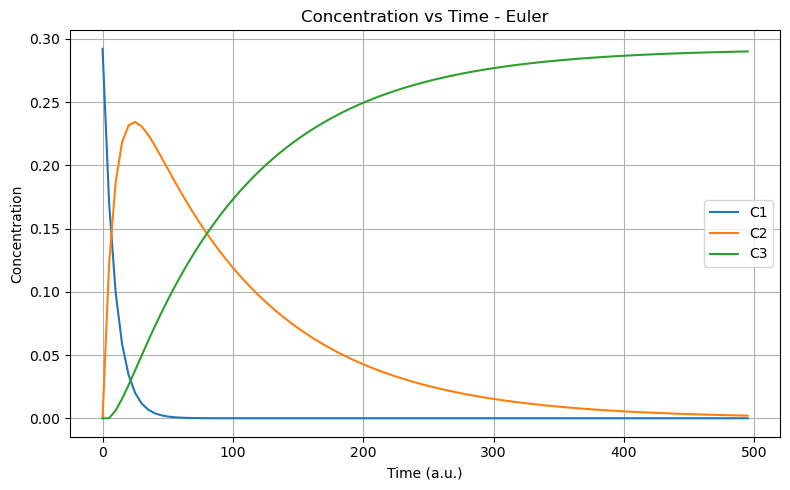

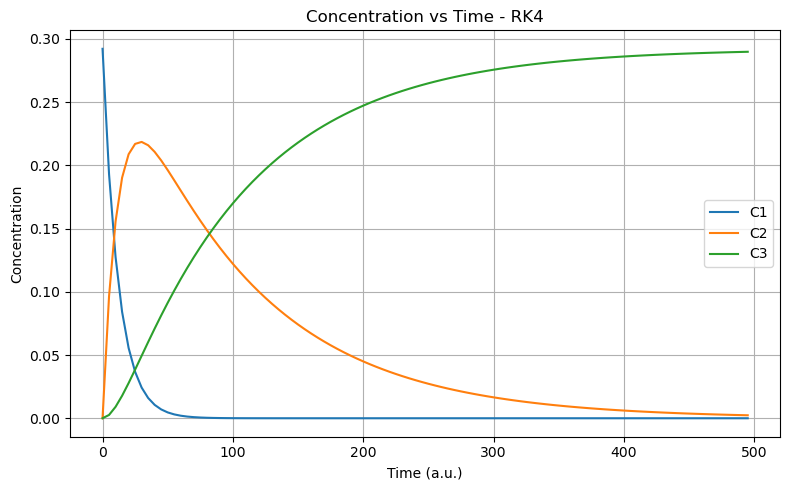

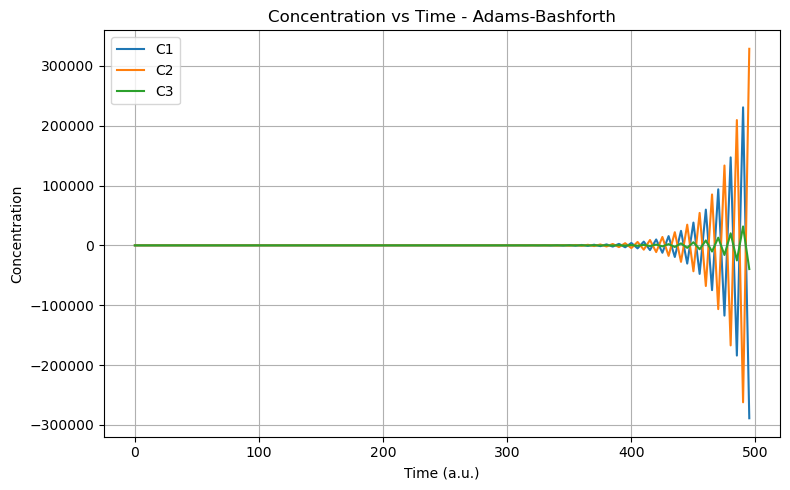

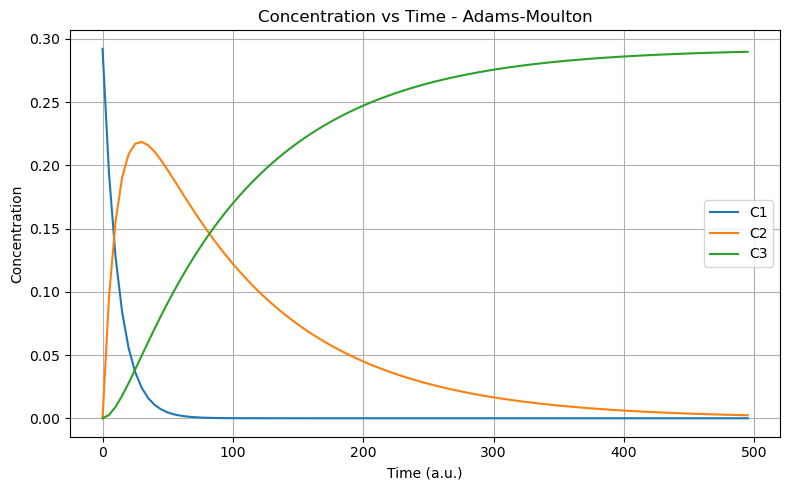

In [ ]:
# Plot the concentration vs time for each method
plot_concentration_vs_time(results_time, t)

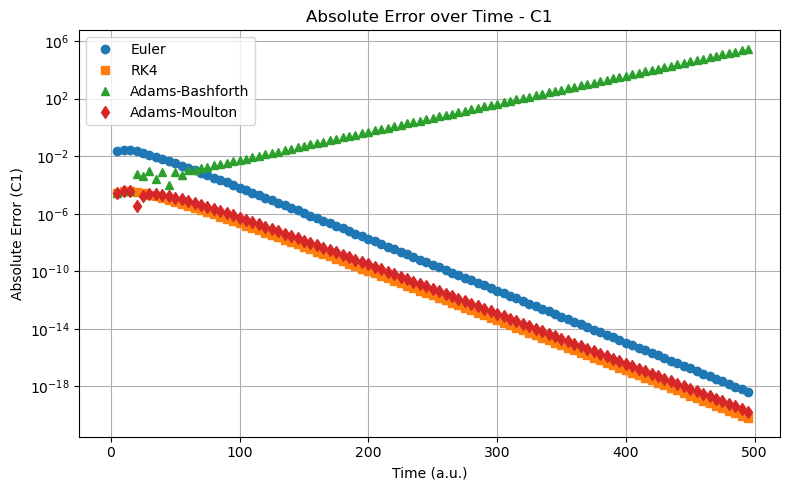

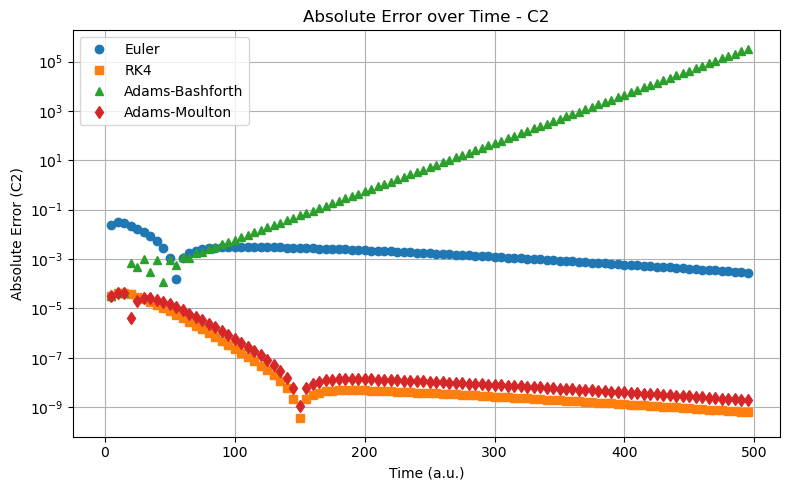

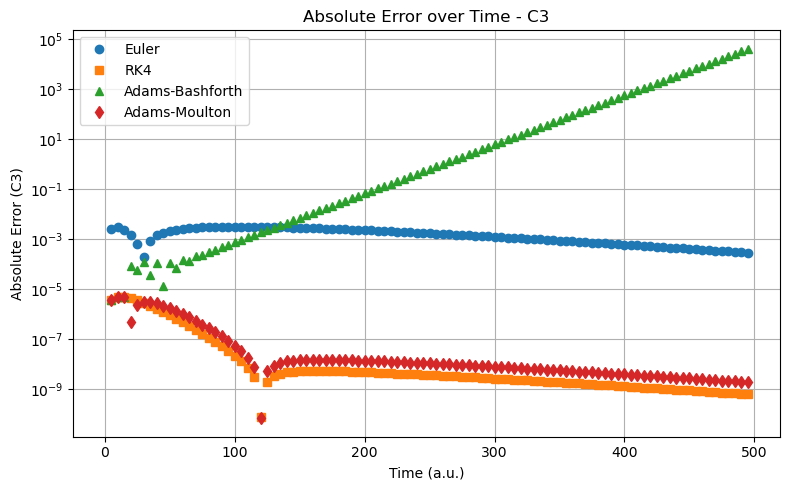

In [ ]:
# Plot the error vs time for each variable
plot_absolute_error(C1_exact,  {k: (v[0], None, None) for k, v in results_time.items()}, 'C1')
plot_absolute_error(C2_exact, {k: (v[1], None, None) for k, v in results_time.items()}, 'C2')
plot_absolute_error(C3_exact, {k: (v[2], None, None) for k, v in results_time.items()}, 'C3')

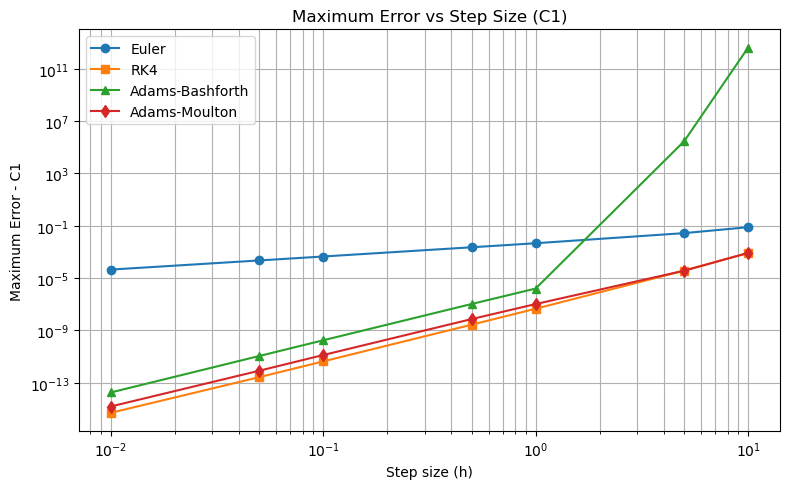

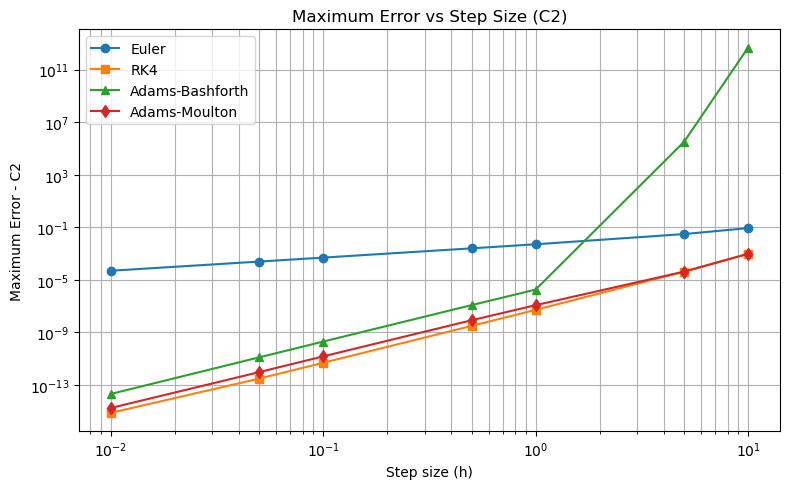

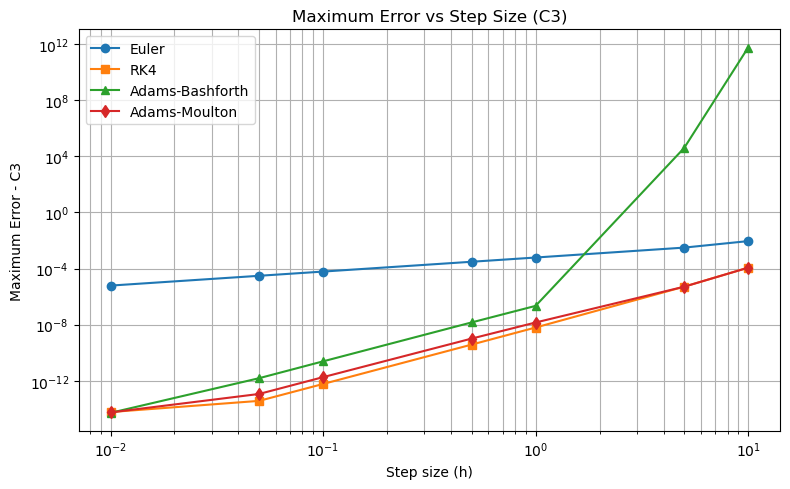

In [ ]:
# Plot the error vs step size for each variable
plot_error_vs_h(df_results, 'C1')
plot_error_vs_h(df_results, 'C2')
plot_error_vs_h(df_results, 'C3')

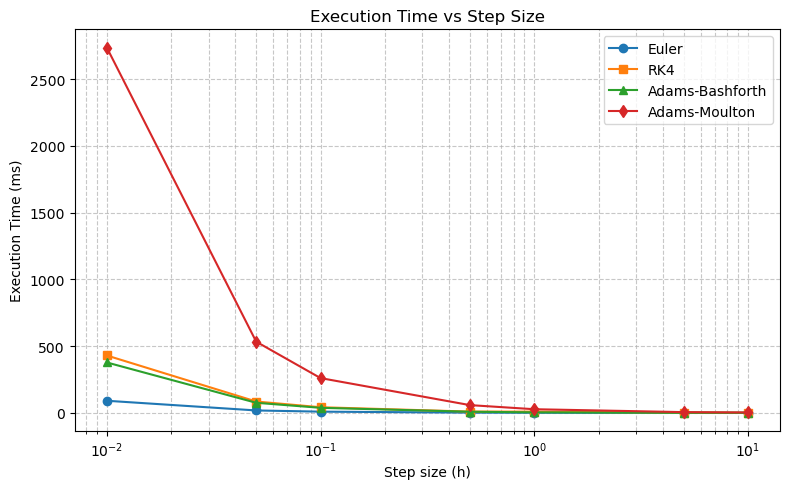

In [ ]:
# Plot the execution time for each method in relation to step size
plot_execution_time(df_results)